# SVM for Cervical Spine Fracture Classification
This is the first notebook for one of the variation of our SVM model, since the training takes a lot of resources and time, we decided to split the training into several notebooks. This notebook is for the SVM model with the following parameters:
* C = 1.0
* kernel = 'poly'

In [1]:
# IMPORTS
import pandas as pd
import sklearn.svm as svm
import joblib
from os import makedirs

## Load Training Data

In [2]:
# Our preprocessed data is stored as a pickle file in the picked_data folder
df_train = pd.read_pickle("../pickled_data/df_train.pkl")
df_train

,image_data,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
...,...,...
3795,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3796,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3797,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
3798,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0


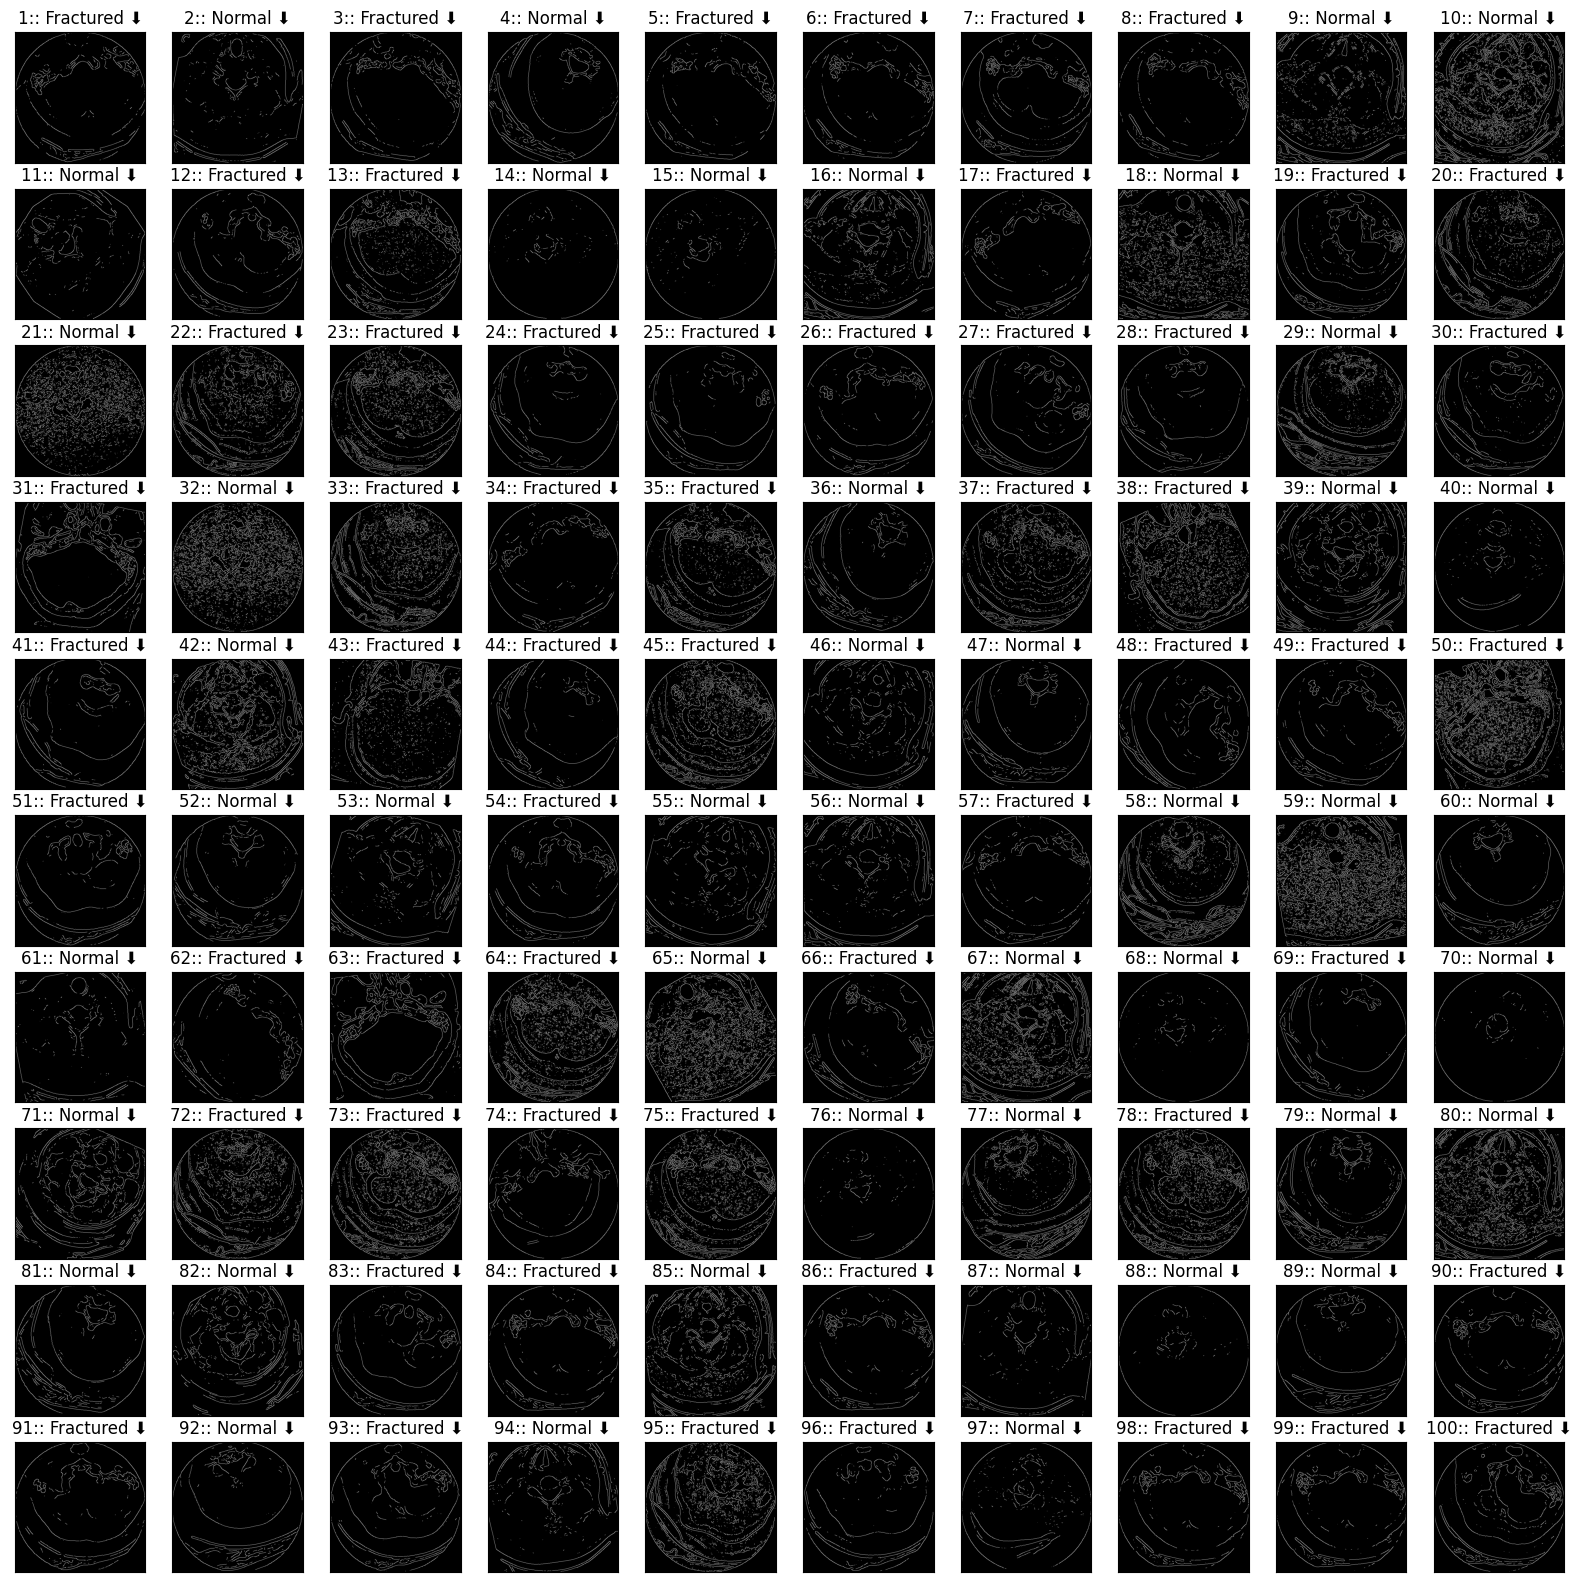

In [3]:
# Before we continue let's try to explore first the image data a bit

# We can plot the first 10 images in the training set
import matplotlib.pyplot as plt
import numpy as np

# We can plot 100 random images from the training set
random_number = np.random.randint(0, len(df_train), 100)
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(df_train.iloc[random_number[i], 0], cmap="gray")
    axi.set(xticks=[], yticks=[])
    title = df_train.iloc[random_number[i], 1]
    if title == 0:
        title = "Normal"
    else:
        title = "Fractured"
    axi.set_title(f"{i+1}:: {title} ⬇️")
plt.show()

## Flatten the image data
This step is necessary since the SVM model from sklearn only accepts a maximum dimension of 2. Hence we need to flatten the image data into a 2D array.

In [4]:
df_train["image_data"] = df_train["image_data"].apply(lambda x: x.flatten())
df_train

,image_data,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
...,...,...
3795,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3796,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3797,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3798,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


## Fitting the SVM model
C = 1.0, kernel = 'poly'

In [5]:
svm_model = svm.SVC(kernel="poly", C=1)
# Fit the model
svm_model.fit(df_train["image_data"].tolist(), df_train["label"].tolist())

SVC(C=1, kernel='poly')

## Save the model
We can save the SVM model using the pickle library. This will allow us to load the model later on without having to train the model again.

This will save us a lot of time and resources.

In [6]:
# Create exported_models directory
makedirs("../exported_models", exist_ok=True)
# Save the svm model
joblib.dump(svm_model, "../exported_models/svm_model_(c).pkl", compress=5)
print("SVM Model Variant (c) Saved Successfully!")

SVM Model Variant (c) Saved Successfully!
